# Vision por Computadora I

## Trabajo Practico N° 1

### Juan Ignacio Ribet

▪ Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

▪ Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
#%matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from glob import iglob
import os

## Parte 1

### coord_cromaticas

In [2]:
# funcion coordenadas cromaticas

def coord_cromaticas(image):

    img = image.copy().astype(float)
    a = np.where(image.sum(axis=2)!=0, image.sum(axis=2), 1)
    for x in range(3):
        img[:,:,x] = np.multiply(img[:,:,x],1/a)
        
    return img

# # funcion coordenadas cromaticas - Opcion 2 (dio el resultado pero fue menos eficiente)

# def coord_cromaticas2(image):
    
#     a = np.where(image.sum(axis=2)!=0, image.sum(axis=2), 1)
#     img_new=[]
#     for x, y in zip(image, a):
#         l=[]
#         for i, j in zip(x,y):
#             l.append(i/j)
#         img_new.append(l)
#     img_new = np.array(img_new)

#     return img_new

# # funcion coordenadas cromaticas - Opcion 3 (dio el resultado pero con un warning y fue la formma menos eficiente de todas)

# def coord_cromaticas3(image):
    
#     img = image.copy().astype(float)
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             img[i,j] = np.where(img[i,j].sum() > 0, image[i,j]/(image[i,j].sum()), 1)
      
#     return img



### white_patch

In [3]:
# funcion white patch

def white_patch(image): 
    Rmax = image[:,:,0].max()
    Gmax = image[:,:,1].max()
    Bmax = image[:,:,2].max()
    c = 255/np.array([Rmax, Gmax, Bmax])
    img = image.copy().astype(float)

    for x, y in zip(range(3),c):
        img[:,:,x] = np.multiply(img[:,:,x],y)


    np.clip(img, 0, 255, out = img)
    img = img.astype('uint8') 

    return img

# funcion white patch por percentile

def white_patch_percentile(image, percentile):
    
    Rmax = np.percentile(image[:,:,0], percentile)
    Gmax = np.percentile(image[:,:,1], percentile)
    Bmax = np.percentile(image[:,:,2], percentile)
    
    c = 255/np.array([Rmax, Gmax, Bmax])
    img = image.copy().astype(float)

    for x, y in zip(range(3),c):
        img[:,:,x] = np.multiply(img[:,:,x],y)


    np.clip(img, 0, 255, out = img)
    img = img.astype('uint8') 

    return img

# # funcion white patch - opción 2 ( menos eficiente)

# def white_patch2(image):
    
#     Rmax = image[:,:,0].max()
#     Gmax = image[:,:,1].max()
#     Bmax = image[:,:,2].max()
#     c = 255/np.array([Rmax, Gmax, Bmax])
#     img_new=[]
#     for x in image:
#         l=[]
#         for y in x:
#             l.append(np.multiply(y,c))
#         img_new.append(l)

#     img_new= np.array(img_new)
#     np.clip(img_new, 0, 255, out = img_new)
#     img_new = img_new.astype('uint8')        
    
#     return img_new

# # funcion white patch por percentile - opción 2 (menos eficiente)

# def white_patch_percentile2(image, percentile):
    
#     Rmax = np.percentile(image[:,:,0], percentile)
#     Gmax = np.percentile(image[:,:,1], percentile)
#     Bmax = np.percentile(image[:,:,2], percentile)
#     c = 255/np.array([Rmax, Gmax, Bmax])

#     img_new=[]    
#     for x in image:
#         l=[]
#         for y in x:
#             l.append(np.multiply(y,c))
#         img_new.append(l)

#     img_new= np.array(img_new)
#     np.clip(img_new, 0, 255, out = img_new)
#     img_new = img_new.astype('uint8')        
    
#     return img_new

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

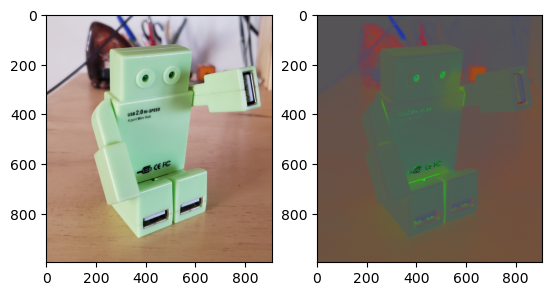

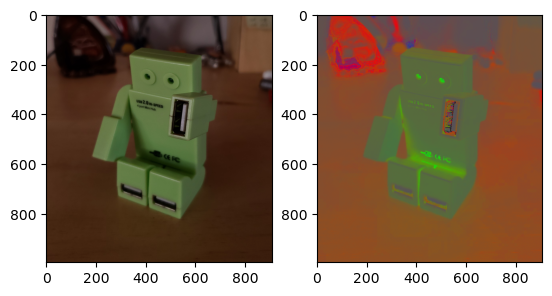

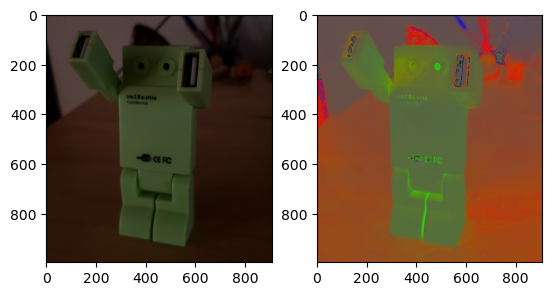

In [4]:
path_files_coord_cromaticas = [f for f in iglob('Material\coord_cromaticas\*', recursive=True) if os.path.isfile(f)]

for path in path_files_coord_cromaticas:
    image = cv.imread(path)
    imgRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    img_coord_cromaticas = coord_cromaticas(imgRGB)
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(imgRGB)
    axs[1].imshow(img_coord_cromaticas)
    
    plt.show()


2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

Rmax= 165, Gmax= 138, Bmax= 200


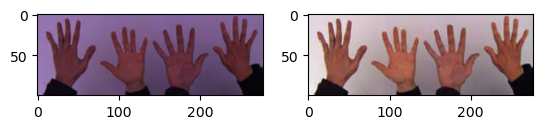

Rmax= 210, Gmax= 250, Bmax= 171


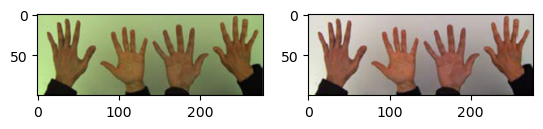

Rmax= 247, Gmax= 157, Bmax= 175


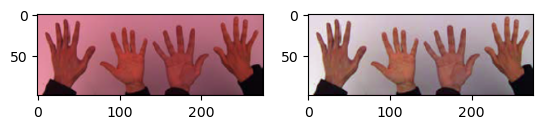

Rmax= 255, Gmax= 255, Bmax= 255


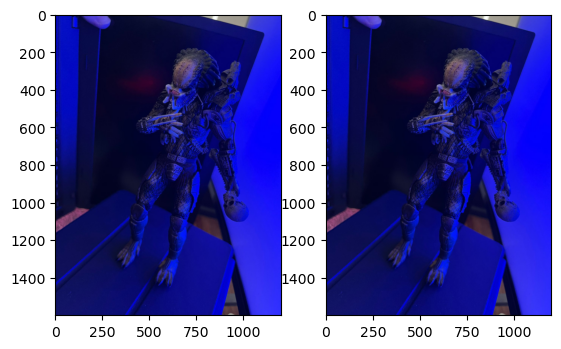

Rmax= 126, Gmax= 252, Bmax= 155


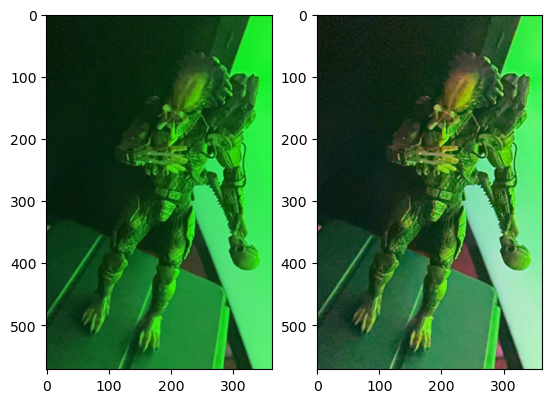

Rmax= 170, Gmax= 255, Bmax= 172


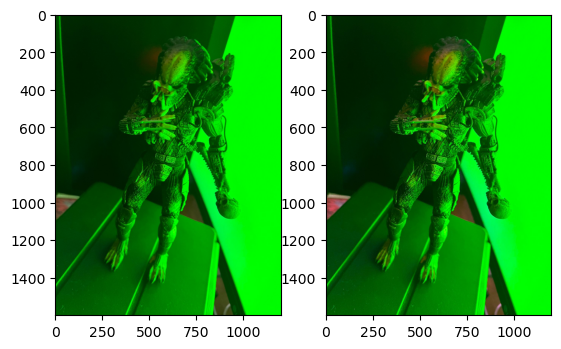

Rmax= 255, Gmax= 134, Bmax= 122


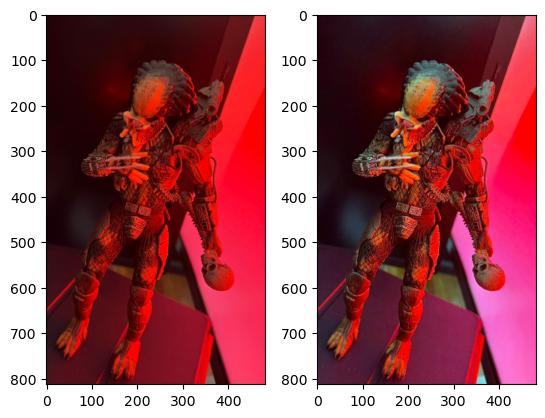

Rmax= 255, Gmax= 201, Bmax= 203


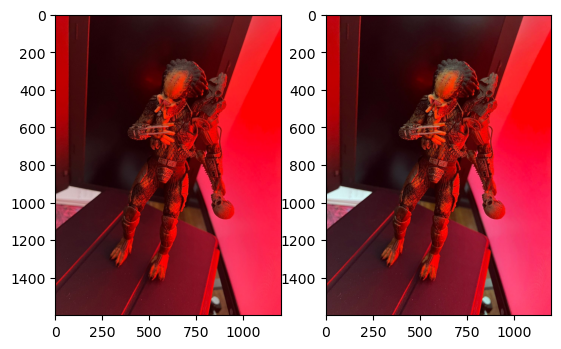

In [5]:
path_files_white_patch = [f for f in iglob('Material\white_patch\*', recursive=True) if os.path.isfile(f)]

for path in path_files_white_patch:
    image = cv.imread(path)
    imgRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    img_white_patch  = white_patch(imgRGB)
    print(f'Rmax= {imgRGB[:,:,0].max()}, Gmax= {imgRGB[:,:,1].max()}, Bmax= {imgRGB[:,:,2].max()}')
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(imgRGB)
    axs[1].imshow(img_white_patch)
    
    plt.show()

3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

### Se ve en la imagen donde Rmax= 255, Gmax= 255, Bmax= 255 el algoritmo no funciona porque no se ve modificado ningun canal. Para este caso se puede utilizar la funcion 'white_patch_percentile' donde el rango de modificación se hace por el percentile indicado.

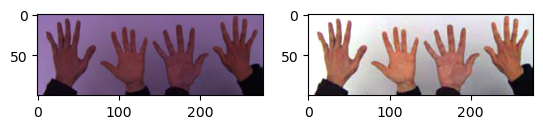

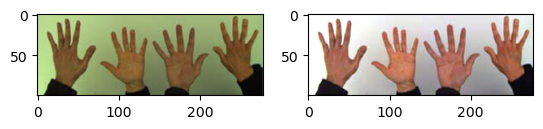

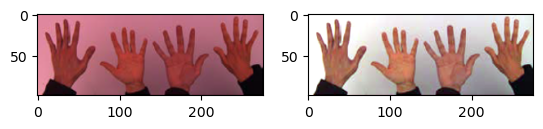

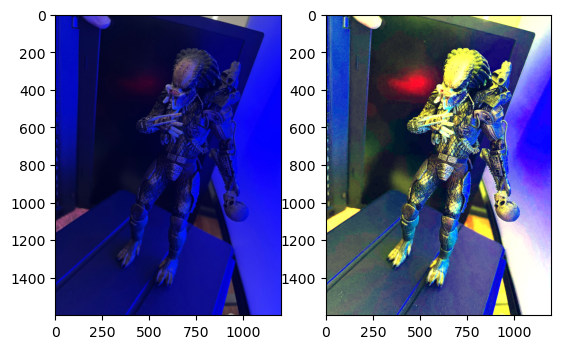

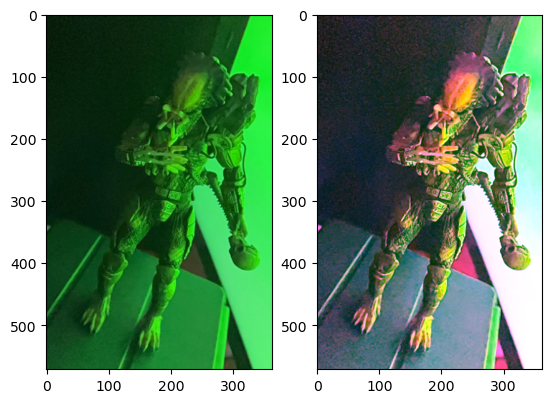

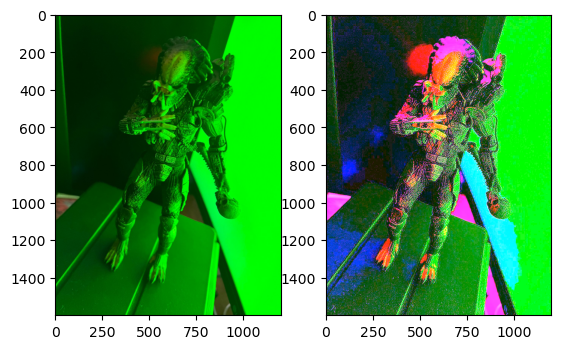

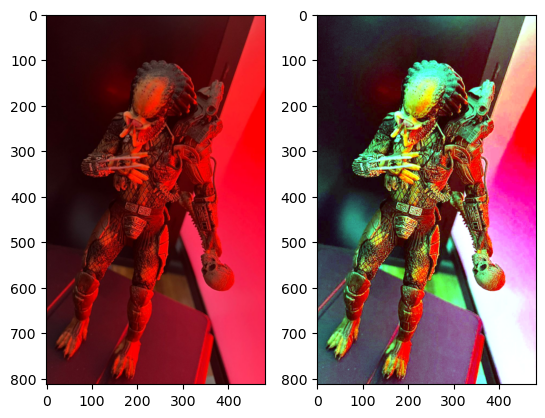

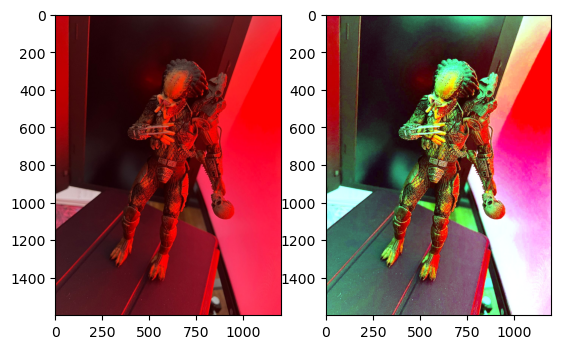

In [6]:
path_files_white_patch = [f for f in iglob('Material\white_patch\*', recursive=True) if os.path.isfile(f)]

for path in path_files_white_patch:
    image = cv.imread(path)
    imgRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    img_white_patch  = white_patch_percentile(imgRGB, 90) #Modifico por el percentile 90
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(imgRGB)
    axs[1].imshow(img_white_patch)
    
    plt.show()

## Parte 2

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

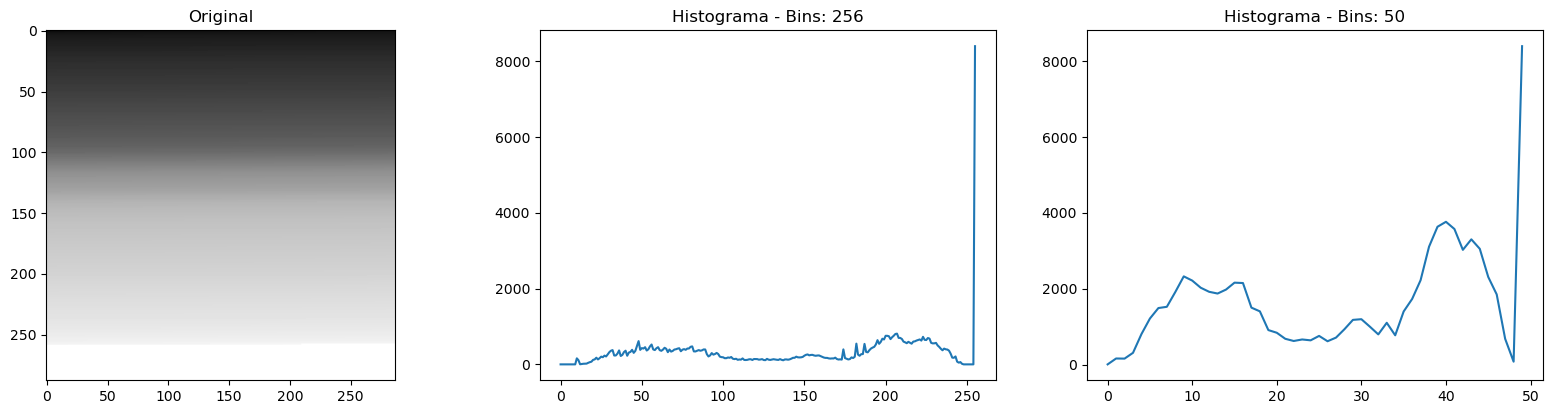

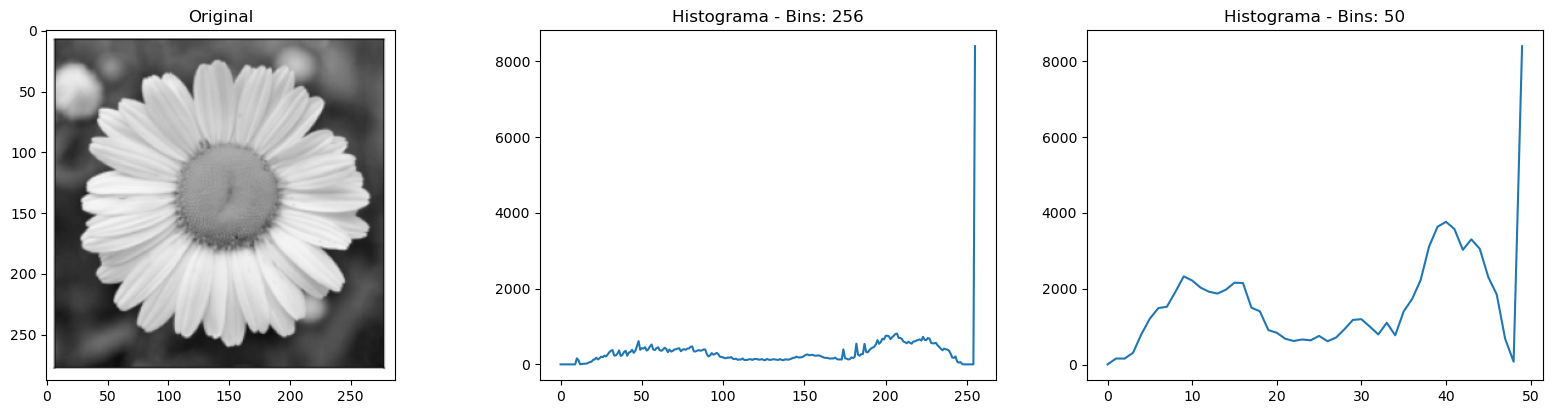

In [7]:
path_files_GRAYSCALE = ['Material\img1_tp.png', 'Material\img2_tp.png']

for path in path_files_GRAYSCALE:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    fig = plt.figure(figsize=(20,10))
    ax1=plt.subplot(231)
    ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax1.set_title('Original')

    n1 = 256
    n2 = 50
    
    hist1,bins1 = np.histogram(img.ravel(),n1,[0,256])
    ax2=plt.subplot(232)
    ax2.set_title(f'Histograma - Bins: {n1}')
    ax2.plot(hist1)

    hist1,bins1 = np.histogram(img.ravel(),n2,[0,256])
    ax3=plt.subplot(233)
    ax3.set_title(f'Histograma - Bins: {n2}')
    ax3.plot(hist1)

    plt.show()

    


3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.

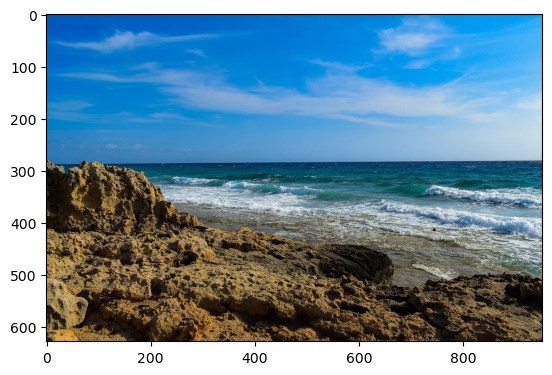

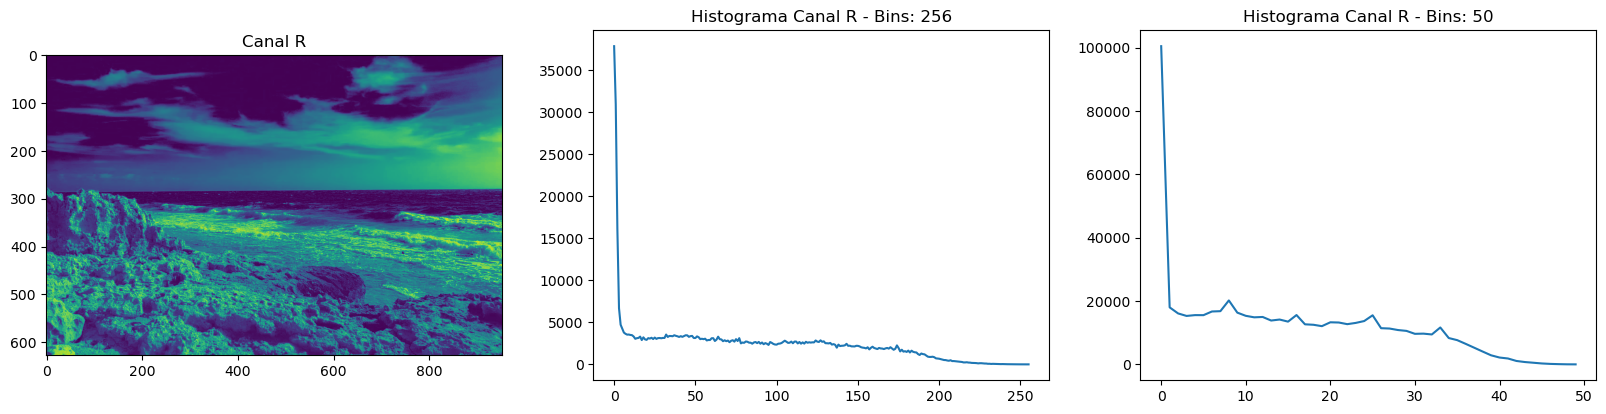

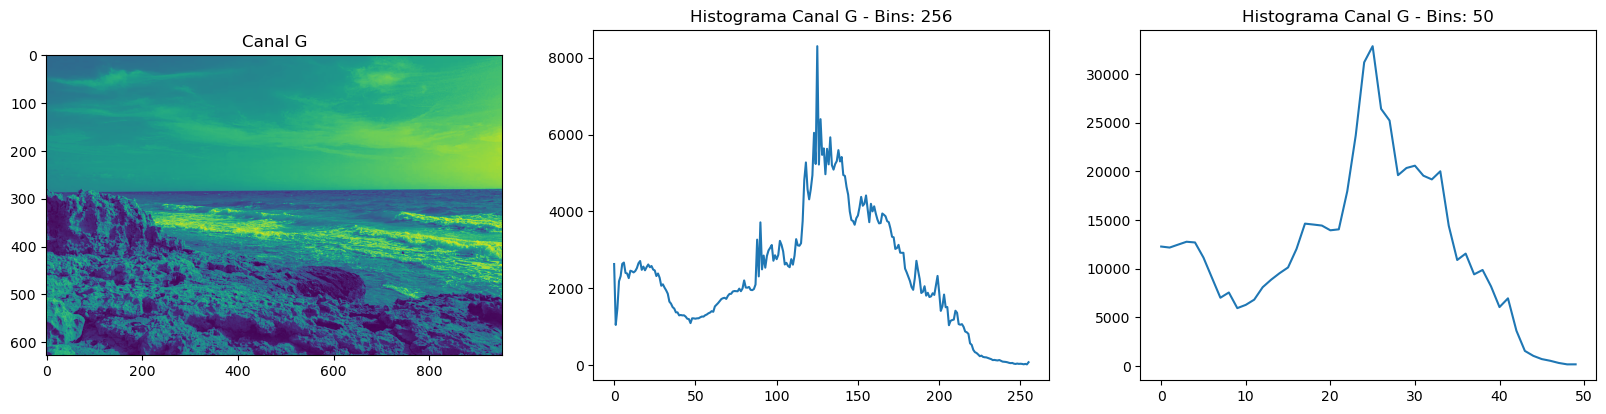

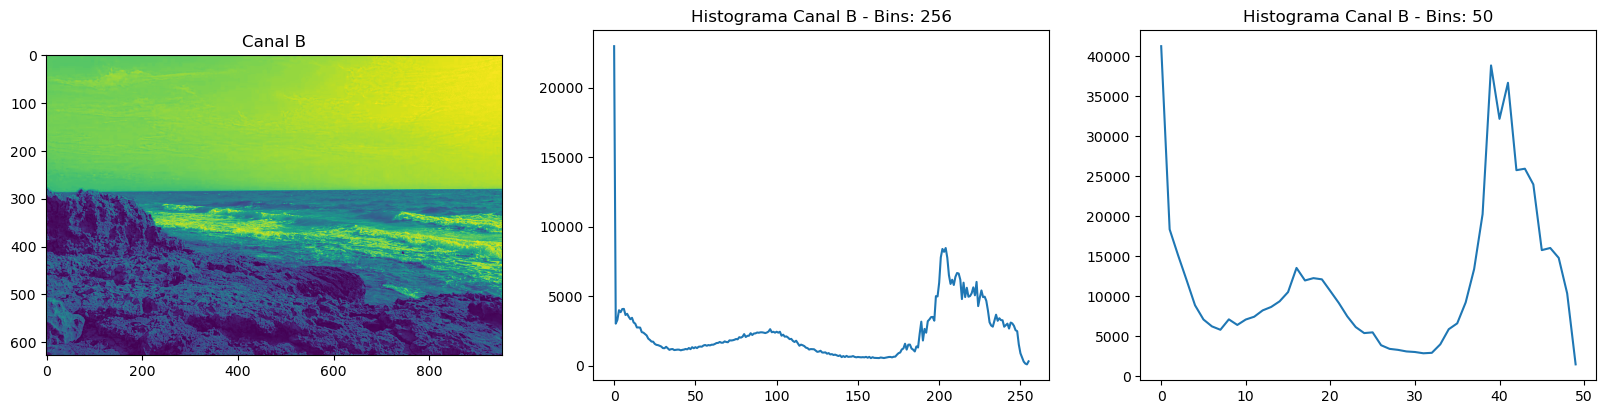

In [10]:
img_segmentacion = cv.imread('Material\segmentacion.png')
imgRGB_segmentacion = cv.cvtColor(img_segmentacion, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(imgRGB_segmentacion)
plt.show()

for x, y  in zip(range(3), ('Canal R','Canal G','Canal B')):

    img = imgRGB_segmentacion[:,:,x]
    fig = plt.figure(figsize=(20,10))
    ax1=plt.subplot(231)
    ax1.imshow(img)
    ax1.set_title(y)

    n1 = 256
    n2 = 50
    
    hist1,bins1 = np.histogram(img.ravel(),n1,[0,256])
    ax2=plt.subplot(232)
    ax2.set_title(f'Histograma {y} - Bins: {n1}')
    ax2.plot(hist1)

    hist1,bins1 = np.histogram(img.ravel(),n2,[0,256])
    ax3=plt.subplot(233)
    ax3.set_title(f'Histograma {y} - Bins: {n2}')
    ax3.plot(hist1)


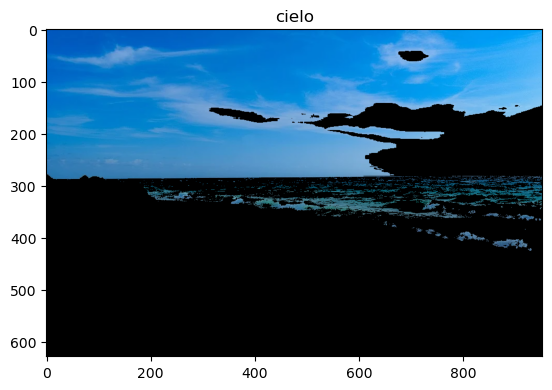

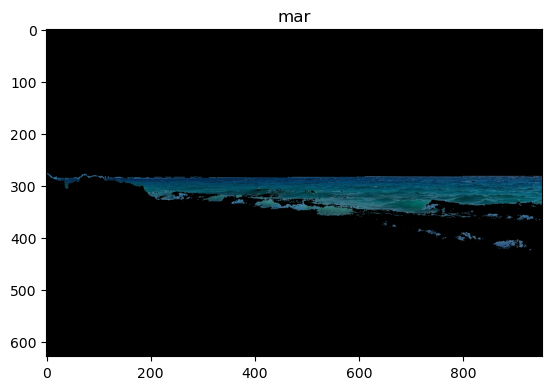

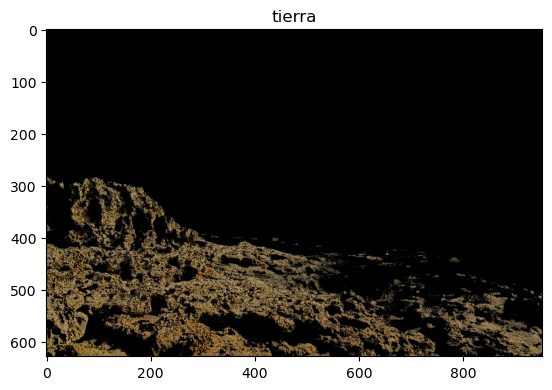

In [46]:
img_HSV = cv.cvtColor(img_segmentacion, cv.COLOR_BGR2HSV)
c_m_t = {'cielo':[50,150,500,600], 'mar':[295,310,400,700], 'tierra':[450,500,150,250]}

for k, i in c_m_t.items():
    img_muestra_hsv = img_HSV[i[0]:i[1],i[2]:i[3],:]
    # plt.figure()
    # plt.imshow(img_muestra_hsv)
    # plt.title(k)

    # Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
    color_mean = cv.mean(img_muestra_hsv)

    
    color_l = np.clip((np.array(color_mean[:-1])*0.5), 0, 255).astype('uint8')    
    color_u = np.clip((np.array(color_mean[:-1])*1.7), 0, 255).astype('uint8')
    

    mask = cv.inRange(img_HSV, color_l,  color_u)
    img_segmentada = cv.bitwise_and(imgRGB_segmentacion, imgRGB_segmentacion, mask=mask)

    plt.figure()
    plt.imshow(img_segmentada)
    plt.title(k)
    plt.show()